In [1]:
import panda_data 
import pandas as pd
from token_manager import get_valid_token
import tushare as ts
import numpy as np
import mplfinance as mpf
import locale
try:
    locale.setlocale(locale.LC_TIME, 'C')
except locale.Error:
    print("Warning: Could not set locale for LC_TIME to 'en_US.UTF-8'. Date formatting might still use system default.")

# todo:
Add adjust factor,

Add returns(3,5bar),

Add entropy(join)


In [2]:
token = get_valid_token()
if token:
    # 初始化 tushare
    ts.set_token(token)
    pro = ts.pro_api()


✓ 从缓存读取到Token，正在验证...
 ✓ Token验证成功


In [3]:
#获取主力合约TF.CFX每日对应的月合约
LC_dominant_id = pro.fut_mapping(ts_code='LC.GFE',start_date='20230101',end_date='20251030')

In [4]:
LC_dominant_id

,ts_code,trade_date,mapping_ts_code
0,LC.GFE,20251030,LC2601.GFE
1,LC.GFE,20251029,LC2601.GFE
2,LC.GFE,20251028,LC2601.GFE
3,LC.GFE,20251027,LC2601.GFE
4,LC.GFE,20251024,LC2601.GFE
...,...,...,...
546,LC.GFE,20230727,LC2401.GFE
547,LC.GFE,20230726,LC2401.GFE
548,LC.GFE,20230725,LC2401.GFE
549,LC.GFE,20230724,LC2401.GFE


In [ ]:
data_lc_df=pd.DataFrame()
data_lc_dict={}
for date, symbol in LC_dominant_id[['trade_date', 'mapping_ts_code']].values:
    
    # 1. Extract the instrument code (letters before the dot)
    # This assumes 'symbol' is a string like 'RB.SHF' or 'CU.SHF'
    # .split('.') gives ['RB', 'SHF'], and [0] selects 'RB'.
    instrument_code = symbol.split('.')[0]
    
    # 2. Get the market data
    # Note: 'trade_date' is used for both start_date and the variable 'date'
    temp = panda_data.get_market_min_data(
        instrument_code,
        start_date=date,       # Using the 'date' variable for the start date
        end_date=date,         # Using the 'date' variable for the end date
        symbol_type='future'
    )
    data_lc_df=pd.concat([data_lc_df,temp])
    # 3. Store the result in the dictionary with the original full symbol as the key
    # data_lc_dict[instrument_code] = temp

In [2]:
date ="20231207"
x=  panda_data.get_market_min_data(
        "LC2401",
        start_date=date,       # Using the 'date' variable for the start date
        end_date=date,         # Using the 'date' variable for the end date
        symbol_type='future'
    )
print(x)

                   date  symbol    close dominant_id exchange     high  \
0   2023-12-07 15:00:00  LC2401  95600.0      LC2401     GFEX  95600.0   
1   2023-12-07 14:59:00  LC2401  95600.0      LC2401     GFEX  95600.0   
2   2023-12-07 14:58:00  LC2401  95600.0      LC2401     GFEX  95600.0   
3   2023-12-07 14:57:00  LC2401  95600.0      LC2401     GFEX  95600.0   
4   2023-12-07 14:56:00  LC2401  95600.0      LC2401     GFEX  95600.0   
..                  ...     ...      ...         ...      ...      ...   
220 2023-12-07 09:05:00  LC2401  93450.0      LC2401     GFEX  93450.0   
221 2023-12-07 09:04:00  LC2401  92950.0      LC2401     GFEX  93550.0   
222 2023-12-07 09:03:00  LC2401  93350.0      LC2401     GFEX  94300.0   
223 2023-12-07 09:02:00  LC2401  94150.0      LC2401     GFEX  94400.0   
224 2023-12-07 09:01:00  LC2401  93750.0      LC2401     GFEX  95500.0   

         low     open trading_code trading_date underlying_symbol   volume  
0    95600.0  95600.0       lc2401

In [ ]:
y = pro.df = pro.ft_mins(ts_code='LC2407.GFE', freq='1min', start_date='2024-12-29 09:00:00', end_date='2023-0-07 19:00:00')
print(y)

Empty DataFrame
Columns: [ts_code, trade_time, open, close, high, low, vol, amount, oi]
Index: []


In [6]:
data_lc_df.to_csv('data_LC_df.csv',index=False)

In [2]:
data_lc_df = pd.read_csv('data_LC_df.csv')

In [3]:
data_lc_df.head(10)

,date,symbol,close,dominant_id,exchange,high,low,open,trading_code,trading_date,underlying_symbol,volume
0,2025-10-30 15:00:00,LC2601,83400.0,LC2601,GFEX,83520.0,83400.0,83420.0,lc2601,20251030,LC,4722.0
1,2025-10-30 14:59:00,LC2601,83420.0,LC2601,GFEX,83460.0,83360.0,83360.0,lc2601,20251030,LC,3267.0
2,2025-10-30 14:58:00,LC2601,83380.0,LC2601,GFEX,83480.0,83300.0,83380.0,lc2601,20251030,LC,3940.0
3,2025-10-30 14:57:00,LC2601,83380.0,LC2601,GFEX,83620.0,83340.0,83620.0,lc2601,20251030,LC,6447.0
4,2025-10-30 14:56:00,LC2601,83620.0,LC2601,GFEX,83740.0,83580.0,83720.0,lc2601,20251030,LC,4450.0
5,2025-10-30 14:55:00,LC2601,83720.0,LC2601,GFEX,83800.0,83680.0,83760.0,lc2601,20251030,LC,2338.0
6,2025-10-30 14:54:00,LC2601,83780.0,LC2601,GFEX,83820.0,83720.0,83800.0,lc2601,20251030,LC,1082.0
7,2025-10-30 14:53:00,LC2601,83820.0,LC2601,GFEX,83820.0,83680.0,83680.0,lc2601,20251030,LC,2026.0
8,2025-10-30 14:52:00,LC2601,83700.0,LC2601,GFEX,83800.0,83700.0,83760.0,lc2601,20251030,LC,1503.0
9,2025-10-30 14:51:00,LC2601,83760.0,LC2601,GFEX,83800.0,83720.0,83740.0,lc2601,20251030,LC,1253.0


In [13]:
def adjust_back_adjustment(df):
    """
    对分钟数据做“主力连续后复权”处理。
    df 格式必须包含：
        trading_date, symbol, close, open, high, low
    """

    if df.empty:
        return df

    # 保证按日期 + 时间排序
    df = df.sort_values(["trading_date", "date"]).copy()

    # 按天分组
    grouped = dict(tuple(df.groupby("trading_date")))

    # 用于记录累计复权因子（乘法形式）
    cumulative_factor = 1.0

    prev_last_close = None  # 前一天主力最后一分钟价格

    # 存储调整后的结果
    adjusted_list = []

    # 按日期遍历
    for trade_date, day_df in grouped.items():
        day_df = day_df.copy()

        # 获取当天第一分钟的 close
        first_close = day_df["close"].iloc[0]

        if prev_last_close is not None:
            # 计算切换因子（若连续则因子接近 1）
            factor = prev_last_close / first_close

            # 更新累计复权因子
            cumulative_factor *= factor

        # 记录今天复权前最后一分钟（用于下一天）
        prev_last_close = day_df["close"].iloc[-1]

        # 应用复权：后复权 = price * cumulative_factor
        for col in ["open", "high", "low", "close"]:
            day_df[col] = day_df[col] * cumulative_factor

        adjusted_list.append(day_df)

    # 合并
    final_df = pd.concat(adjusted_list, ignore_index=True)
    final_df.to_csv("LC_20230721_20251030_Adjusted.csv", index=False)
    return final_df

In [4]:
data_lc_df.columns

Index(['date', 'symbol', 'close', 'dominant_id', 'exchange', 'high', 'low',
       'open', 'trading_code', 'trading_date', 'underlying_symbol', 'volume'],
      dtype='object')

In [14]:
data_lc_df_adjust = adjust_back_adjustment(data_lc_df)

In [15]:
data_lc_df_adjust.head(10)

,date,symbol,close,dominant_id,exchange,high,low,open,trading_code,trading_date,underlying_symbol,volume
0,2023-07-21 09:01:00,LC2401,229100.0,LC2401,GFEX,238900.0,226000.0,238900.0,lc2401,20230721,LC,3762.0
1,2023-07-21 09:02:00,LC2401,228850.0,LC2401,GFEX,231150.0,227000.0,229200.0,lc2401,20230721,LC,1453.0
2,2023-07-21 09:03:00,LC2401,229050.0,LC2401,GFEX,230250.0,228350.0,228850.0,lc2401,20230721,LC,934.0
3,2023-07-21 09:04:00,LC2401,227900.0,LC2401,GFEX,229050.0,227650.0,228900.0,lc2401,20230721,LC,688.0
4,2023-07-21 09:05:00,LC2401,227000.0,LC2401,GFEX,228150.0,225500.0,227800.0,lc2401,20230721,LC,947.0
5,2023-07-21 09:06:00,LC2401,225950.0,LC2401,GFEX,227650.0,225400.0,227000.0,lc2401,20230721,LC,579.0
6,2023-07-21 09:07:00,LC2401,227850.0,LC2401,GFEX,228050.0,225950.0,225950.0,lc2401,20230721,LC,750.0
7,2023-07-21 09:08:00,LC2401,228850.0,LC2401,GFEX,228900.0,227800.0,227800.0,lc2401,20230721,LC,622.0
8,2023-07-21 09:09:00,LC2401,228100.0,LC2401,GFEX,229000.0,227900.0,228950.0,lc2401,20230721,LC,430.0
9,2023-07-21 09:10:00,LC2401,228050.0,LC2401,GFEX,228500.0,227500.0,228100.0,lc2401,20230721,LC,465.0


In [ ]:
def build_bin_ohlc(data_frame, minutes, fig = False, x_threshold = None,x_threshold_side='last'):

    
    # 1. Ensure 'date' is a datetime object and set as index
    # We use .copy() to avoid SettingWithCopyWarning if the input data_frame
    # is a slice of another DataFrame.
    df = data_frame.copy()
    
    # Check if 'date' column exists and convert to datetime if necessary
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        df = df.set_index('date')
    
    # Check if index is datetime type (essential for resample)
    if not isinstance(df.index, pd.DatetimeIndex):
         raise ValueError("DataFrame index must be a DatetimeIndex after processing 'date' column.")

    # 2. Define the aggregation logic for OHLCV
    # '3min' for 3 minutes, '5min' for 5 minutes, etc. 'min' stands for minutes.
    resample_rule = f'{minutes}min'
    
    # Define how each column should be aggregated
    agg_dict = {
        'open': 'first',  # Open price is the first price in the period
        'high': 'max',    # High price is the max price in the period
        'low': 'min',     # Low price is the min price in the period
        'close': 'last',  # Close price is the last price in the period
        'volume': 'sum'   # Volume is the sum of volume in the period
    }

    # Filter the aggregation dictionary to only include columns present in the DataFrame
    valid_cols = [col for col in agg_dict.keys() if col in df.columns]
    final_agg_dict = {col: agg_dict[col] for col in valid_cols}
    
    if not final_agg_dict:
        raise ValueError("DataFrame is missing required OHLCV columns ('open', 'high', 'low', 'close', 'volume')")

    # 3. Resample and Aggregate
    ohlcv_df = df.resample(resample_rule, closed='left', label='left').agg(final_agg_dict)
    
    # Remove rows where all OHLCV data is NaN (periods with no trades)
    ohlcv_df = ohlcv_df.dropna(subset=['close'])
    
    # 4. Optional Plotting using mplfinance
    if fig:
        # mplfinance requires column names to be capitalized: Open, High, Low, Close, Volume
        ohlcv_df.columns = [col.capitalize() for col in ohlcv_df.columns]

        plot_df = ohlcv_df
        side_text = 'All'
        if x_threshold is not None and len(ohlcv_df) > x_threshold:
            # Select only the last 'x_threshold' number of rows for plotting
            if x_threshold_side == 'first':
                plot_df = ohlcv_df.iloc[x_threshold:]
                side_text = 'First'
            elif x_threshold_side == 'last':
                plot_df = ohlcv_df.iloc[-x_threshold:]
                side_text = 'Last'
            else:
                raise ValueError("x_threshold_side must be 'first' or 'last'.")

        
        # Plot and return figure/axes tuple
        # Style set for better visibility of volume
        locale.setlocale(locale.LC_TIME, 'C')
        mpf.plot(
            plot_df, 
            figsize=(16, 6),
            type='candle', 
            volume=True, 
            style='charles', 
            title=f'{minutes}-Minute OHLCV Chart ({side_text} {len(plot_df)} Bins)',
            returnfig=True
        )
    
    # 5. Return the resulting DataFrame
    return ohlcv_df

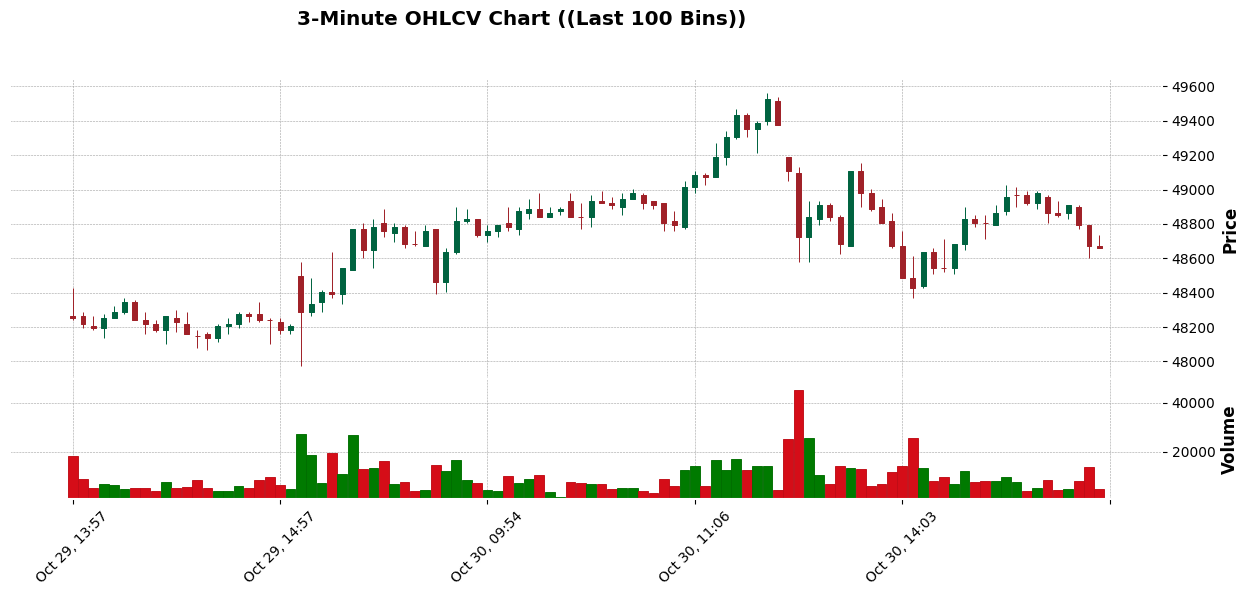

In [37]:
three_min_ohlc = build_bin_ohlc(data_lc_df_adjust, 3, fig=True, x_threshold=100)

In [39]:
three_min_ohlc.to_csv('three_min_ohlc.csv')

In [38]:
three_min_ohlc.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [40]:
def ret (df, periods=[1,3,5]):
    if 'Close' not in df.columns:
        print("Error: DataFrame must contain a 'Close' column.")
        return df

    # Calculate returns for each specified period
    for period in periods:
        new_col_name = f'Return_{period}'
        # Calculate the periodic return using the shifted 'Close' price
        # (Current Close / Close 'period' days ago) - 1
        df[new_col_name] = (df['Close'] / df['Close'].shift(period)) - 1
        
    return df

In [41]:
ret_df = ret(three_min_ohlc, periods=[1,3,5])
ret_df.head()

,Open,High,Low,Close,Volume,Return_1,Return_3,Return_5
date,,,,,,,,
2023-07-21 09:00:00,238900.0,238900.0,226000.0,228850.0,5215.0,NaN,NaN,NaN
2023-07-21 09:03:00,228850.0,230250.0,225500.0,227000.0,2569.0,-0.008084,NaN,NaN
2023-07-21 09:06:00,227000.0,228900.0,225400.0,228850.0,1951.0,0.008150,NaN,NaN
2023-07-21 09:09:00,228950.0,229000.0,227500.0,228000.0,1204.0,-0.003714,-0.003714,NaN
2023-07-21 09:12:00,228000.0,228450.0,226250.0,226350.0,923.0,-0.007237,-0.002863,NaN


In [45]:
def get_threshold(df, quantile=0.6):
    
    label = df['Return_1'].dropna()  # 去掉 NaN

    # 右侧累积概率 0.4 对应左侧累积概率 0.6
    threshold = np.quantile(label, quantile)

    print(f"右侧面积{1-quantile}对应的阈值:", threshold)
    # 0.0002714
    return threshold


def mark_lable(df):
    
    # df['Return_1'] = df['close'].pct_change(periods=1).shift(-1)
    threshold = get_threshold(df)
    df['label'] = (df['Return_1'] > threshold).astype(int)
    return df

In [46]:
labeled_df = mark_lable(ret_df)
labeled_df.head()

右侧面积0.4对应的阈值: 0.0002714440825188902


,Open,High,Low,Close,Volume,Return_1,Return_3,Return_5,label
date,,,,,,,,,
2023-07-21 09:00:00,238900.0,238900.0,226000.0,228850.0,5215.0,NaN,NaN,NaN,0
2023-07-21 09:03:00,228850.0,230250.0,225500.0,227000.0,2569.0,-0.008084,NaN,NaN,0
2023-07-21 09:06:00,227000.0,228900.0,225400.0,228850.0,1951.0,0.008150,NaN,NaN,1
2023-07-21 09:09:00,228950.0,229000.0,227500.0,228000.0,1204.0,-0.003714,-0.003714,NaN,0
2023-07-21 09:12:00,228000.0,228450.0,226250.0,226350.0,923.0,-0.007237,-0.002863,NaN,0


In [47]:
labeled_df.columns


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Return_1', 'Return_3',
       'Return_5', 'label'],
      dtype='object')

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [56]:
def random_forest_classifier(df):
    rf_classifier = RandomForestClassifier(
        n_estimators=100,
        criterion='gini',
        random_state=42,
        class_weight='balanced'
    )
    features = ['Open', 'High', 'Low', 'Close']
    target = 'label'

    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    criterion='gini',
    random_state=42,
    class_weight='balanced'
    )

    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\n--- Model Performance Metrics ---")
    print(f"Accuracy Score: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    feature_importances = pd.Series(rf_classifier.feature_importances_, index=features)
    print("\nTop 5 Feature Importances:")
    print(feature_importances.sort_values(ascending=False))

In [57]:
random_forest_classifier(labeled_df)


--- Model Performance Metrics ---
Accuracy Score: 0.7108

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.60      0.71      4428
           1       0.59      0.87      0.71      2951

    accuracy                           0.71      7379
   macro avg       0.73      0.74      0.71      7379
weighted avg       0.76      0.71      0.71      7379


Top 5 Feature Importances:
Open     0.365834
Close    0.333940
High     0.150343
Low      0.149884
dtype: float64


In [18]:
def build_bin_vol_ohlc(data_frame: pd.DataFrame, fig: bool = False, x_threshold = None, bin_size=0.1, x_threshold_side='last'):

    
    # 1. Ensure 'date' is a datetime object and set as index
    # We use .copy() to avoid SettingWithCopyWarning if the input data_frame
    # is a slice of another DataFrame.
    df = data_frame.copy()
    
    # Check if 'date' column exists and convert to datetime if necessary
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        df = df.set_index('date')
    
    # Check if index is datetime type (essential for resample)
    if not isinstance(df.index, pd.DatetimeIndex):
         raise ValueError("DataFrame index must be a DatetimeIndex after processing 'date' column.")

    # 2. Define the aggregation logic for OHLCV
    first_vol_idx = df['volume'][df['volume'] > 0].first_valid_index()
    if pd.isna(first_vol_idx):
        raise ValueError("No volume data available in the DataFrame.")

    df['cumulative_volume'] = df['volume'].cumsum()
    initial_cum_vol = df.loc[first_vol_idx, 'cumulative_volume']
    if initial_cum_vol == 0:
        raise ValueError("Initial cumulative volume is zero, cannot compute volume bins.")
    df['cum_vol_growth'] = (df['cumulative_volume'] / initial_cum_vol) - 1
    max_growth = df['cum_vol_growth'].max()
    if not np.isfinite(max_growth) or max_growth <= 0:
        raise ValueError("Cumulative volume growth is not positive or finite, cannot compute volume bins.")
    
    bins = np.arange(0, max_growth + bin_size, bin_size)
    if len(bins) < 2:
        raise ValueError("Not enough bins created for volume growth; adjust bin_size or check data.")
    
    df['vol_growth_bin'] = pd.cut(df['cum_vol_growth'], bins=bins, right=False, include_lowest=True)
    
    ohlc_by_vol = df.groupby('vol_growth_bin', observed=False).agg(
        Open=('open', 'first'),
        High=('high', 'max'),
        Low=('low', 'min'),
        Close=('close', 'last')
    )
    # ohlc_by_vol.dropna(inplace=True)

    # Save our desired percentage labels
    x_axis_labels = ohlc_by_vol.index.map(lambda x: f"{x.left:.0f}")
    
    # Create a dummy DatetimeIndex to satisfy mplfinance
    dummy_index = pd.to_datetime(pd.date_range(start='2024-01-01', periods=len(ohlc_by_vol)))
    ohlc_by_vol.set_index(dummy_index, inplace=True)
    
    print(f"Generated {len(ohlc_by_vol)} OHLC bars.")
    
    # 4. Optional Plotting using mplfinance
    if fig:
                # mplfinance requires column names to be capitalized: Open, High, Low, Close, Volume
        ohlc_by_vol.columns = [col.capitalize() for col in ohlc_by_vol.columns]

        # --- IMPLEMENTING x_threshold HERE ---
        plot_df = ohlc_by_vol
        plot_labels = x_axis_labels
        side_text = 'All'
        
        if x_threshold is not None and len(ohlc_by_vol) > x_threshold:
            if x_threshold_side == 'first':
                # Select the FIRST x_threshold rows
                plot_df = ohlc_by_vol.iloc[:x_threshold]
                plot_labels = x_axis_labels[:x_threshold]
                side_text = 'First'
            elif x_threshold_side == 'last':
                # Select the LAST x_threshold rows (default)
                plot_df = ohlc_by_vol.iloc[-x_threshold:]
                plot_labels = x_axis_labels[-x_threshold:]
                side_text = 'Last'
            else:
                raise ValueError("x_threshold_side must be 'first' or 'last'.")

        _fig, axlist = mpf.plot(plot_df, 
                                        figsize=(16, 6),
                                        type='candle',
                                        style='charles',
                                        title=f'Price Action per {bin_size:.0%} Volume Growth ({side_text} {len(plot_df)} Bins)',
                                        ylabel='Price',
                                        xlabel='Cumulative Volume Growth Interval',
                                        returnfig=True)
        # Manually set the x-axis tick labels to our saved percentage labels
        ax=axlist[0]
        n_bins = len(plot_df)
        positions = range(n_bins)

        # 根据标签数量自动计算间隔
        if n_bins > 20:
            step = n_bins // 10  # 最多显示10个标签
        elif n_bins > 10:
            step = 2
        else:
            step = 1

        selected_positions = positions[::step]
        selected_labels = [plot_labels[i] for i in selected_positions]

        ax.set_xticks(selected_positions)
        ax.set_xticklabels(selected_labels, rotation=90)
        # Display the plot
        mpf.show()
    
    # 5. Return the resulting DataFrame
    return ohlc_by_vol

Generated 28249 OHLC bars.


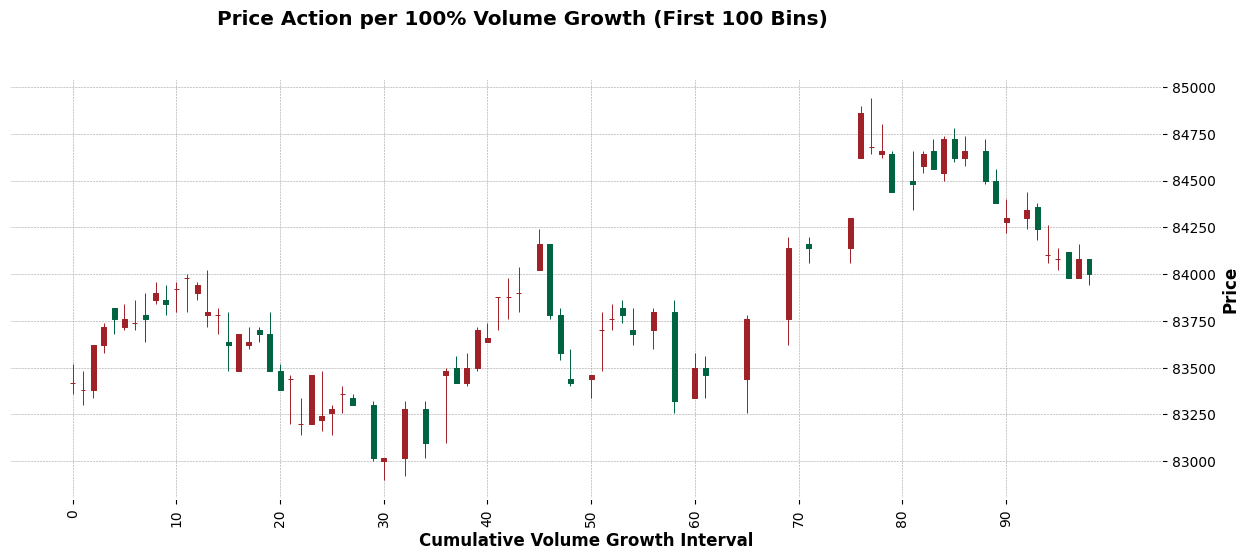

,Open,High,Low,Close
2024-01-01,83420.0,83520.0,83360.0,83420.0
2024-01-02,83380.0,83480.0,83300.0,83380.0
2024-01-03,83620.0,83620.0,83340.0,83380.0
2024-01-04,83720.0,83740.0,83580.0,83620.0
2024-01-05,83760.0,83820.0,83680.0,83820.0
...,...,...,...,...
2101-05-01,218050.0,223000.0,216800.0,222600.0
2101-05-02,221000.0,223750.0,219000.0,219750.0
2101-05-03,226150.0,229000.0,222100.0,227850.0
2101-05-04,227000.0,231150.0,225400.0,228850.0


In [27]:
build_bin_vol_ohlc(data_lc_df, fig=True, x_threshold=100, bin_size=1, x_threshold_side='first')